# Introduction

This project will investigate if there is a strong correlation between the economic output of a country and the life expectancy of its citizens.

The goals are to prepare data, followed by analysis with plots, and seek to explain the findings from the study.

Here are a few questions that this project will seek to answer:

+ Has life expectancy increased over time in the six nations?
+ Has GDP increased over time in the six nations?
+ Is there a correlation between GDP and life expectancy of a country?
+ What is the average life expectancy in these nations?
+ What is the distribution of that life expectancy?

**Data sources**

- GDP Source: [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) national accounts data, and OECD National Accounts data files.

- Life expectancy Data Source: [World Health Organization](http://apps.who.int/gho/data/node.main.688)

## Import Python Modules

First import the preliminary modules that will be used in this project:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Loading the Data

To look for connections between GDP (Gross Domestic Product in U.S. dollars) and life expectancy load the datasets into DataFrames so that they can be visualized.

Here **data.2021.csv** will be read in into a DataFrame called `data`, followed by a quick inspection of the DataFrame using `.head()` to check its contents.

In [2]:
data =pd.read_csv('data.2021.csv')
print(data.head())


  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                            76.870  7.824988e+10
1   Chile  2001                            76.773  7.151727e+10
2   Chile  2002                            77.445  7.029523e+10
3   Chile  2003                            77.387  7.650785e+10
4   Chile  2004                            77.616  9.907937e+10


## Explore the Data

First, more needs to be explored about the countries that are represented in `data`. There seems to be six countries, Chile, China, Germany, Mexico, the US, and Zimbabwe represented in the data.

In [3]:
print(data.Country.unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


The next step is to find out which years are represented in the data, and they are 2000-2021.

In [4]:
print(data.Year.unique())

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016 2017 2018 2019 2020 2021]


Now, is possibile to analys some information of the `data` like if there are any Not A Number (nan) values in the dataframe and how many, how many observation are in the dataframe and what is the type of the values of the single column. In this dataframe  there are 132 observations with no nan values, `Contry` as the data type of **string**, `Year` as **integer** and `GDP` and `Life expectancy at birth (years)` as **floats**.

In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           132 non-null    object 
 1   Year                              132 non-null    int64  
 2   Life expectancy at birth (years)  132 non-null    float64
 3   GDP                               132 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 4.2+ KB
None


#### Cleaning Column Name

Looking over the data, there are inconsistencies with the column names. For example, the first two column names are one word each, while the third is five words long! `Life expectancy at birth (years)` is descriptive, which will be good for labeling the axis, but a little difficult to wrangle for coding the plot itself. The `rename` function is used to change the column name to `Life`.
The country name `United Stated of America` in the **Country** column will be changed in `USA` to be moer easy to call function and methods on it.

In [6]:
data = data.rename(columns={'Life expectancy at birth (years)': 'Life'})
data = data.replace(to_replace= 'United States of America', value= 'USA')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  132 non-null    object 
 1   Year     132 non-null    int64  
 2   Life     132 non-null    float64
 3   GDP      132 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 4.2+ KB


#### Exploratory Plots

Exploring data through plots can sometimes be much more effective, below the distribution of `Life` is being shown. The distribution of `Life` in the data is left skewed where most of the values are on the right-hand side.

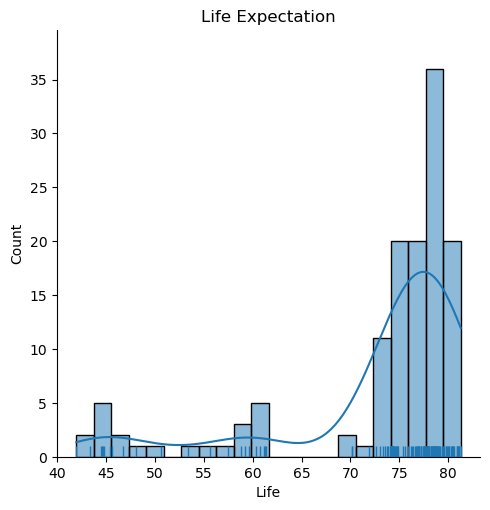

In [7]:
sns.displot(data = data, x = 'Life', kde = True, rug = True)
plt.title('Life Expectation')
plt.show()

Next, the distribution of `GDP` was examinated. The distribution of `GDP` in the data is very left skewed where most of the values are on the left-hand side. This type of distribution could be described as a power law distribution, which is a common enough distribution that it has its own name. This is the opposite of what observed on the `Life` column. Futher analysis will show gruping of destributions with the range. 

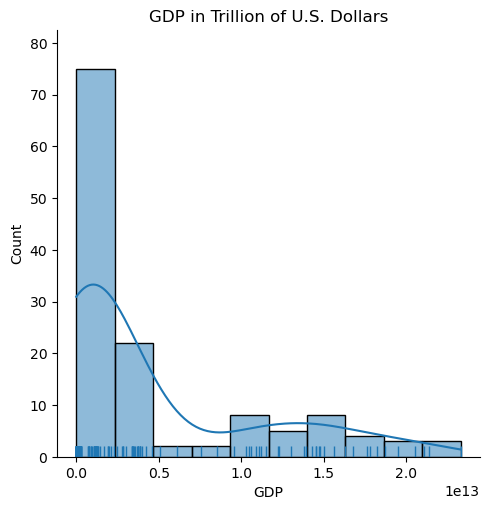

In [8]:
sns.displot(data = data, x = 'GDP', kde = True, rug = True)
plt.title('GDP in Trillion of U.S. Dollars')
plt.show()

In the next plot, a bar plot is used to show the `Life` and the `GDP` for all the six countries.

The first plot is showing the `Life Expectation`. All the countries are around mid 70s except for the Zimbabwe, with an avarage of early 50s. This could be the reason of the skwed distrubition in the previous plot.

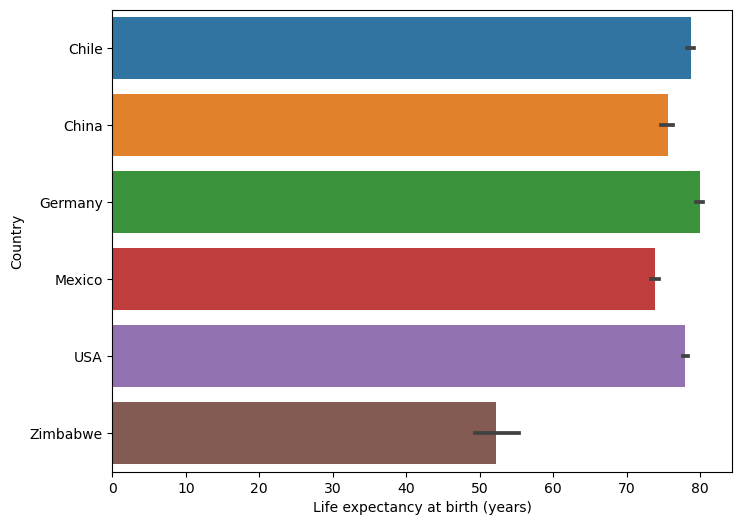

In [9]:
df = data.drop('Year', axis = 1)
plt.figure(figsize=(8,6))
sns.barplot(x="Life", y="Country", data=df)
plt.xlabel("Life expectancy at birth (years)");


In this plot for `GDP`, Usa have the most higher value compared to the rest of the countries.  Zimbabwe is not even visible, Chile is just barely seen and China, Germany and Mexico are close.

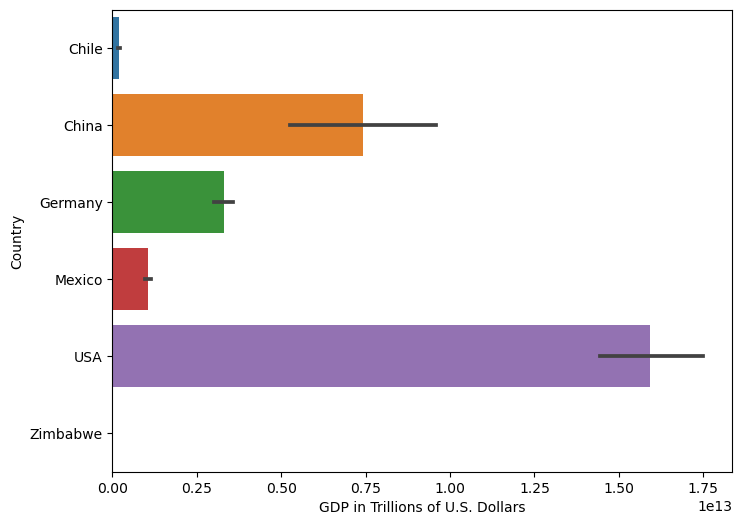

In [10]:
plt.figure(figsize=(8,6))
sns.barplot(x="GDP", y="Country", data=df)
plt.xlabel("GDP in Trillions of U.S. Dollars");

In this plot all the countries are togheter with the `GDP` on the left side and the `Life` on the right. 

In the `GDP` plot, China and USA hava a wide range whie Chile, Germany, Mexico and Zimbabwe have a short range.

In the `Life` plot, all the contries have a short range while Zimbabwe has a very high varience, going from mid 30s to high 60s.


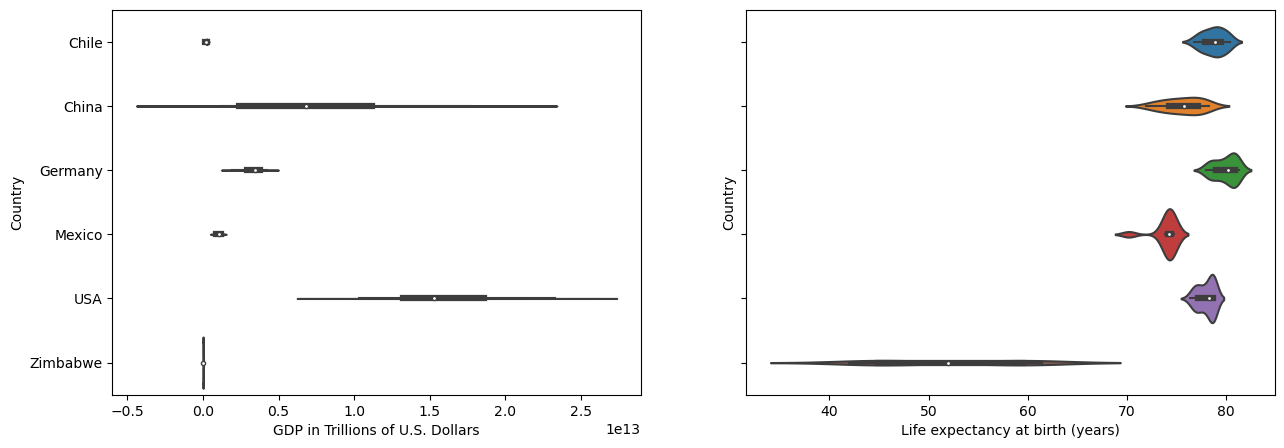

In [11]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 5))
axes[0] = sns.violinplot(ax=axes[0], x=df.GDP, y=df.Country)
axes[0].set_xlabel("GDP in Trillions of U.S. Dollars")
axes[1] = sns.violinplot(ax=axes[1], x=df.Life, y=df.Country)
axes[1].set_xlabel("Life expectancy at birth (years)");

In this plot the `GDP` is show on all the years from 2000 to 2020. USA and China have gain a lot: china go from less than a quarter of trillion dollars to less then a quarter to two trillion dollars. The rest of the others countries did not see increases of magnitude. 

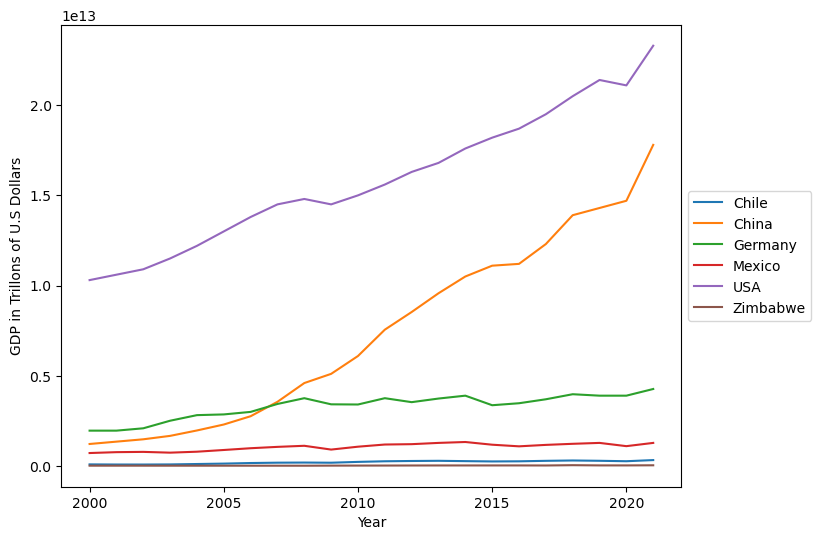

In [12]:
plt.figure(figsize = (8,6))
sns.lineplot(data = data, x = 'Year', y = 'GDP', hue = 'Country')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.ylabel("GDP in Trillons of U.S Dollars")
plt.show()

This plot shows the `GDP` in the yaers separte per countries. Once again all the contries made an increase over time but it make clear the difference between Usa and China with Chile, Germany, Mexico and Zimbabwe.

d:\Software\Anaconda3\envs\wit-python-ds\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
d:\Software\Anaconda3\envs\wit-python-ds\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
d:\Software\Anaconda3\envs\wit-python-ds\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
d:\Software\Anaconda3\envs\wit-python-ds\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
d:\Software\Anaconda3\envs\wit-python-ds\lib\site-packag

Text(0.5, 0.98, 'GDP by Country')

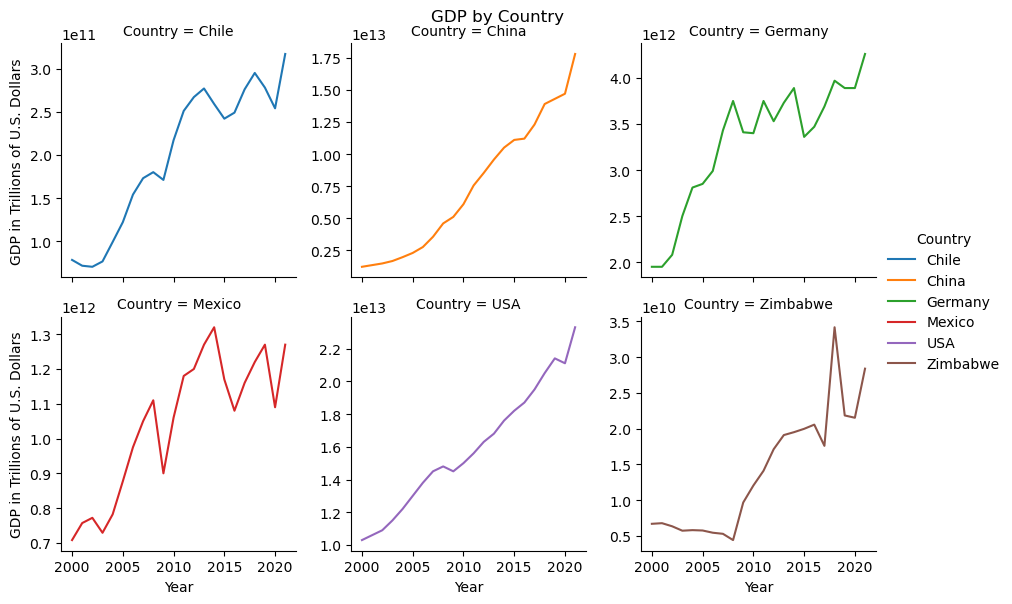

In [13]:
graphGDP = sns.FacetGrid(data, col="Country", col_wrap=3, hue = "Country", sharey = False)

graphGDP = (graphGDP.map(sns.lineplot,"Year","GDP").add_legend().set_axis_labels("Year","GDP in Trillions of U.S. Dollars"))
graphGDP.fig.suptitle ('GDP by Country', verticalalignment = 'baseline')

The chart below shows the life expectancy over the years. It shows almost every contry increase their life untill the sadly year of 2019, with the spred of the *Covid-19 virus*. Mexico it was that one hit most, bring the expectency below the begginner value. Zimbabwe has seen a very strong increase after the 2008.

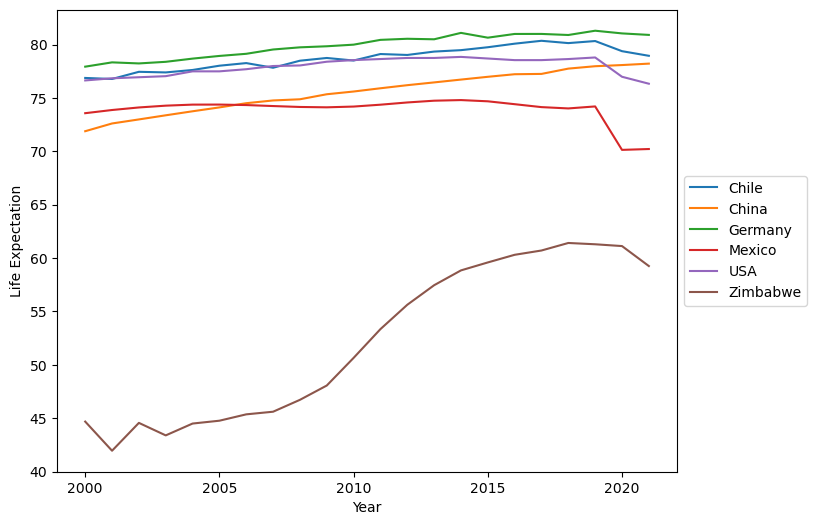

In [14]:
plt.figure(figsize = (8,6))
sns.lineplot(data = data, x = 'Year', y = 'Life', hue = 'Country')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel("Life Expectation")
plt.show()

In this plot, `Life` line chart is separate by countries. It shows better the importance of the *Covid-19 pandemic* on the life expectancy. Mexico and USA reach the 70s and the 75s respectivly, a result highly lower from the expectancy of 2000. The other countrie seems to be effected a litle.

d:\Software\Anaconda3\envs\wit-python-ds\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
d:\Software\Anaconda3\envs\wit-python-ds\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
d:\Software\Anaconda3\envs\wit-python-ds\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
d:\Software\Anaconda3\envs\wit-python-ds\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
d:\Software\Anaconda3\envs\wit-python-ds\lib\site-packag

Text(0.5, 0.98, 'Life Expectancy by Country')

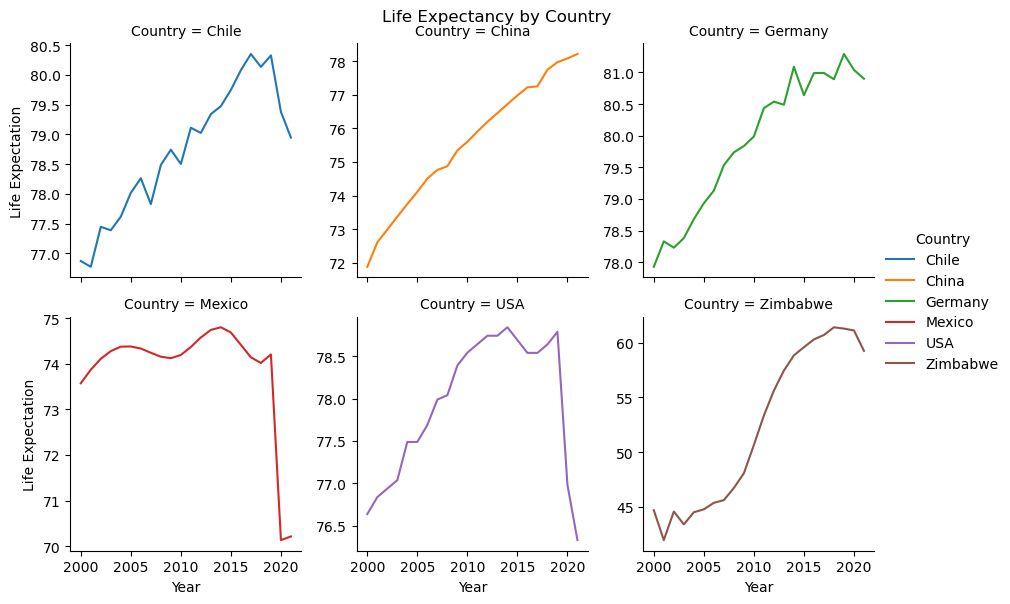

In [15]:
graphGDP = sns.FacetGrid(data, col="Country", col_wrap=3, hue = "Country", sharey = False)

graphGDP = (graphGDP.map(sns.lineplot,"Year","Life").add_legend().set_axis_labels("Year","Life Expectation"))
graphGDP.fig.suptitle ('Life Expectancy by Country', verticalalignment = 'baseline')

## Conclusion

This project shows that country with high GDP has higer life expectancy at the birth as they can have better life conditions, education, foods, healthcare, and money to invest in futher new medical treatments. 
From the year 2019, with the spred of the Covid-19 Pandemic, both GDP and Life Expectancy are decrised. Some countries  was hit in a very drastic way, bring the Life expectancy back to the same level of the year 2000, the begginning of the analisys. 
This project was able to answer some question posed at the beginnig:

- Has life expectancy increased over time in the six nations?
    - Yes, espacially in Zimbabwe  with an increise of 15 years.
- Has GDP increased over time in the six nations?
    - GDP increase as well, especially for China.
- Is there a correlation between GDP and life expectancy of a country?
    - Yes, there is a positive correlation.
- What is the average life expectancy in these nations?
    - The avarage life expectancy is between high 70's and early 80's while early 50's for Zimbabwe.
- What is the distribution of that life expectancy?
    - The distribution for the life expectancy is left skwed, with a lot of observetion on the right side of the plot.